<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span><ul class="toc-item"><li><span><a href="#Attribute-Information" data-toc-modified-id="Attribute-Information-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Attribute Information</a></span></li></ul></li><li><span><a href="#Data-Source" data-toc-modified-id="Data-Source-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Source</a></span></li><li><span><a href="#Importing-the-Libraries" data-toc-modified-id="Importing-the-Libraries-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing the Libraries</a></span></li><li><span><a href="#Dataset-Preparation" data-toc-modified-id="Dataset-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dataset Preparation</a></span></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualisation</a></span><ul class="toc-item"><li><span><a href="#Countplots" data-toc-modified-id="Countplots-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Countplots</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Heatmap</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul></li></ul></div>

# Problem Statement

**Can you predict the class of animals?**

The purpose of this dataset is to be able to predict the classification of the animals, based upon the variables.

## Attribute Information

- animal_name : Unique for each instance
- hair : Boolean
- feathers : Boolean
- eggs : Boolean
- milk : Boolean
- airborne : Boolean
- aquatic : Boolean
- predator : Boolean
- toothed : Boolean
- backbone : Boolean
- breathes : Boolean
- venomous : Boolean
- fins : Boolean
- legs : Numeric (set of values: {0,2,4,5,6,8})
- tail : Boolean
- domestic : Boolean
- catsize : Boolean
- class_type : Numeric

The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

# Data Source

Kaggle - https://www.kaggle.com/uciml/zoo-animal-classification

UCI Machine Learning Repository - http://archive.ics.uci.edu/ml/datasets/Zoo

# Importing the Libraries

In [38]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# Dataset Preparation

In [2]:
zoo = pd.read_csv("zoo.csv")
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [12]:
zoo.shape

(101, 18)

In [13]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [16]:
zoo.describe(include='all')

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
unique,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,frog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,NaN,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000


In [17]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [19]:
zoo.isnull().sum(axis=0)

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

# Visualisation

## Countplots

<AxesSubplot:xlabel='catsize', ylabel='count'>

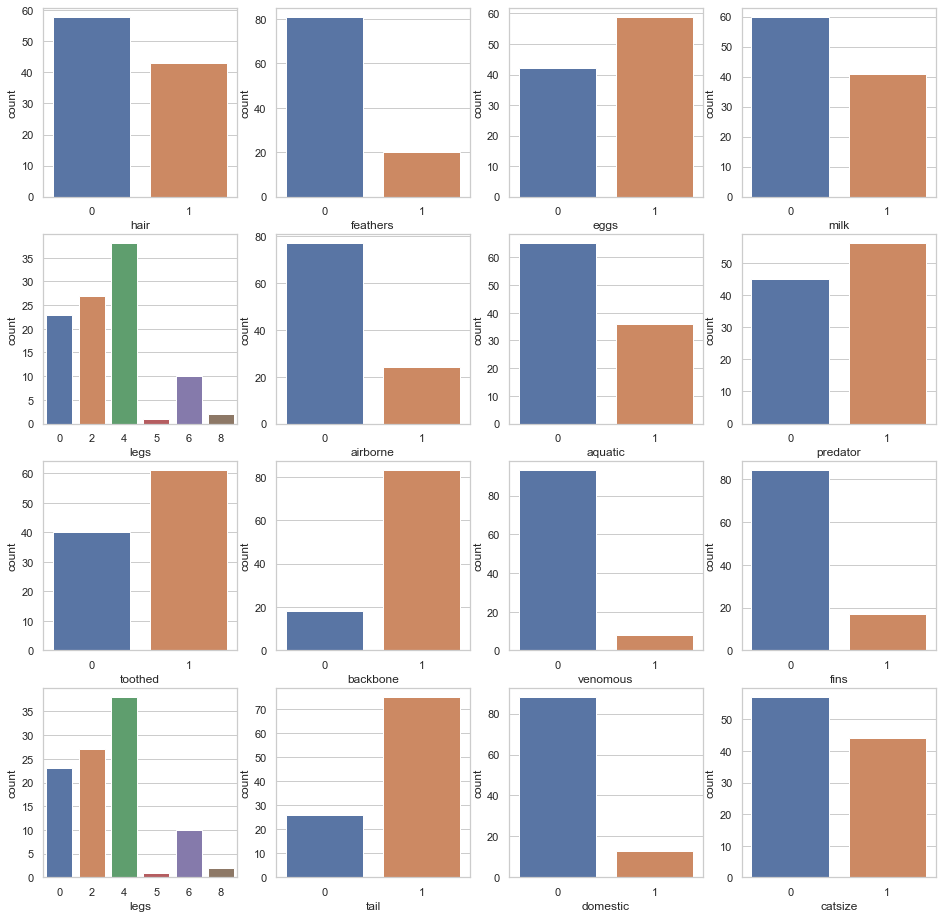

In [35]:
fig, axes = plt.subplots(4, 4, figsize=(16,16))
sns.set_theme(style="whitegrid")
sns.countplot(x='hair',data=zoo, ax=axes[0,0])
sns.countplot(x='feathers',data=zoo, ax=axes[0,1])
sns.countplot(x='eggs',data=zoo, ax=axes[0,2])
sns.countplot(x='milk',data=zoo, ax=axes[0,3])
sns.countplot(x='legs',data=zoo, ax=axes[1,0])
sns.countplot(x='airborne',data=zoo, ax=axes[1,1])
sns.countplot(x='aquatic',data=zoo, ax=axes[1,2])
sns.countplot(x='predator',data=zoo, ax=axes[1,3])
sns.countplot(x='toothed',data=zoo, ax=axes[2,0])
sns.countplot(x='backbone',data=zoo, ax=axes[2,1])
sns.countplot(x='venomous',data=zoo, ax=axes[2,2])
sns.countplot(x='fins',data=zoo, ax=axes[2,3])
sns.countplot(x='legs',data=zoo, ax=axes[3,0])
sns.countplot(x='tail',data=zoo, ax=axes[3,1])
sns.countplot(x='domestic',data=zoo, ax=axes[3,2])
sns.countplot(x='catsize',data=zoo, ax=axes[3,3])


## Heatmap

Text(0.5, 1.05, 'Correlation of ZOO Features')

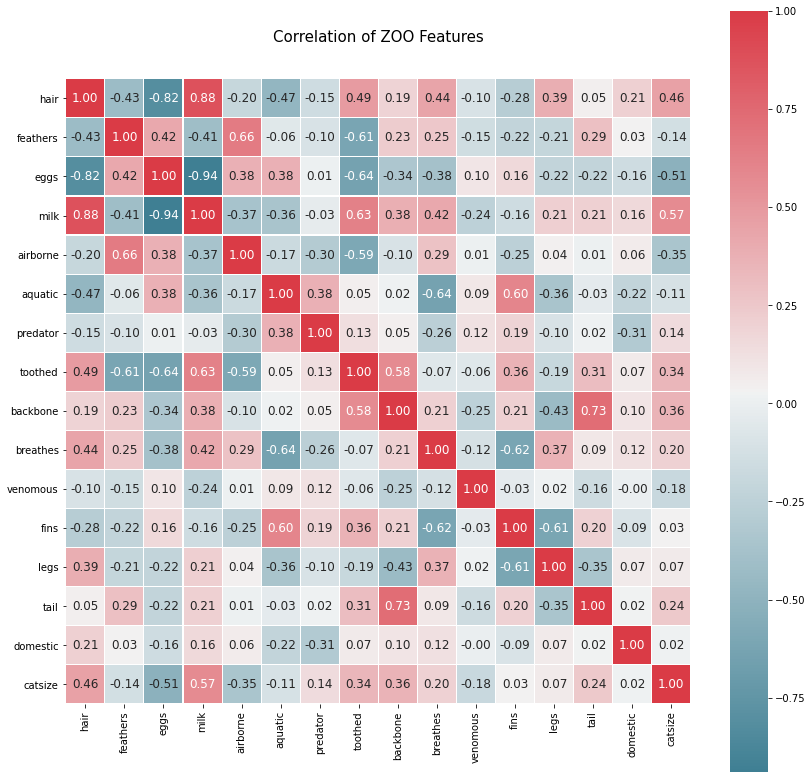

In [5]:
corr = zoo.iloc[:,1:-1].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of ZOO Features', y=1.05, size=15) 

# Model Building

In [20]:
X = zoo.iloc[:,1:-1]
y = zoo.iloc[:,-1:]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2, random_state=0)

In [26]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('XGB', xgb.XGBClassifier(eval_metric='merror')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.900000 (0.093541)
LDA: 0.900000 (0.093541)
KNN: 0.812500 (0.083853)
CART: 0.937500 (0.062500)
NB: 0.925000 (0.061237)
RFC: 0.950000 (0.061237)
XGB: 0.937500 (0.062500)


## Hyperparameter Tuning

As per the accuracy score, RFC is the best fitted model on the dataset.<br>
Therefore, we will perform Hyperparameter Tuning on RFC to find out the best results.

In [39]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 8)]
max_depth = [int(x) for x in np.linspace(5, 25, num = 5)]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               }

In [40]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid,
                               scoring='accuracy', n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)

In [41]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   26.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   random_state=0, scoring='accuracy', verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 500, 'max_depth': 20}

In [43]:
rf_random.best_score_

0.95

In [44]:
predictions=rf_random.predict(X_test)

## Model Evaluation

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

[[7 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 5 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


1.0